In [1]:
import numpy as np
import sys
sys.path.insert(0, '..') #This line adds '..' to the path so we can import the net_framework python file
from RNN_model import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx
import scipy.signal as sp
from scipy.integrate import odeint
import random
import pickle
import seaborn as sns

In [2]:
def feedback(x):
    if x.timestep < 10:
        return 0
    else:
        output = x.output_node_list[0]
        activation = output.get_activation(x.timestep - 10)
        return 1.3 * np.tanh(np.sin(np.pi * activation))
    
f = lambda t : .5 * sp.sawtooth(2 * np.pi * 1/100 * t, width = 0.5) + .5 * np.sin(2 * np.pi * 1/50 * t + np.pi/4)

with open('saved_nets/sin_and_sawtooth.RNN', 'rb') as RNN_file:
    loaded_RNN = pickle.load(RNN_file)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


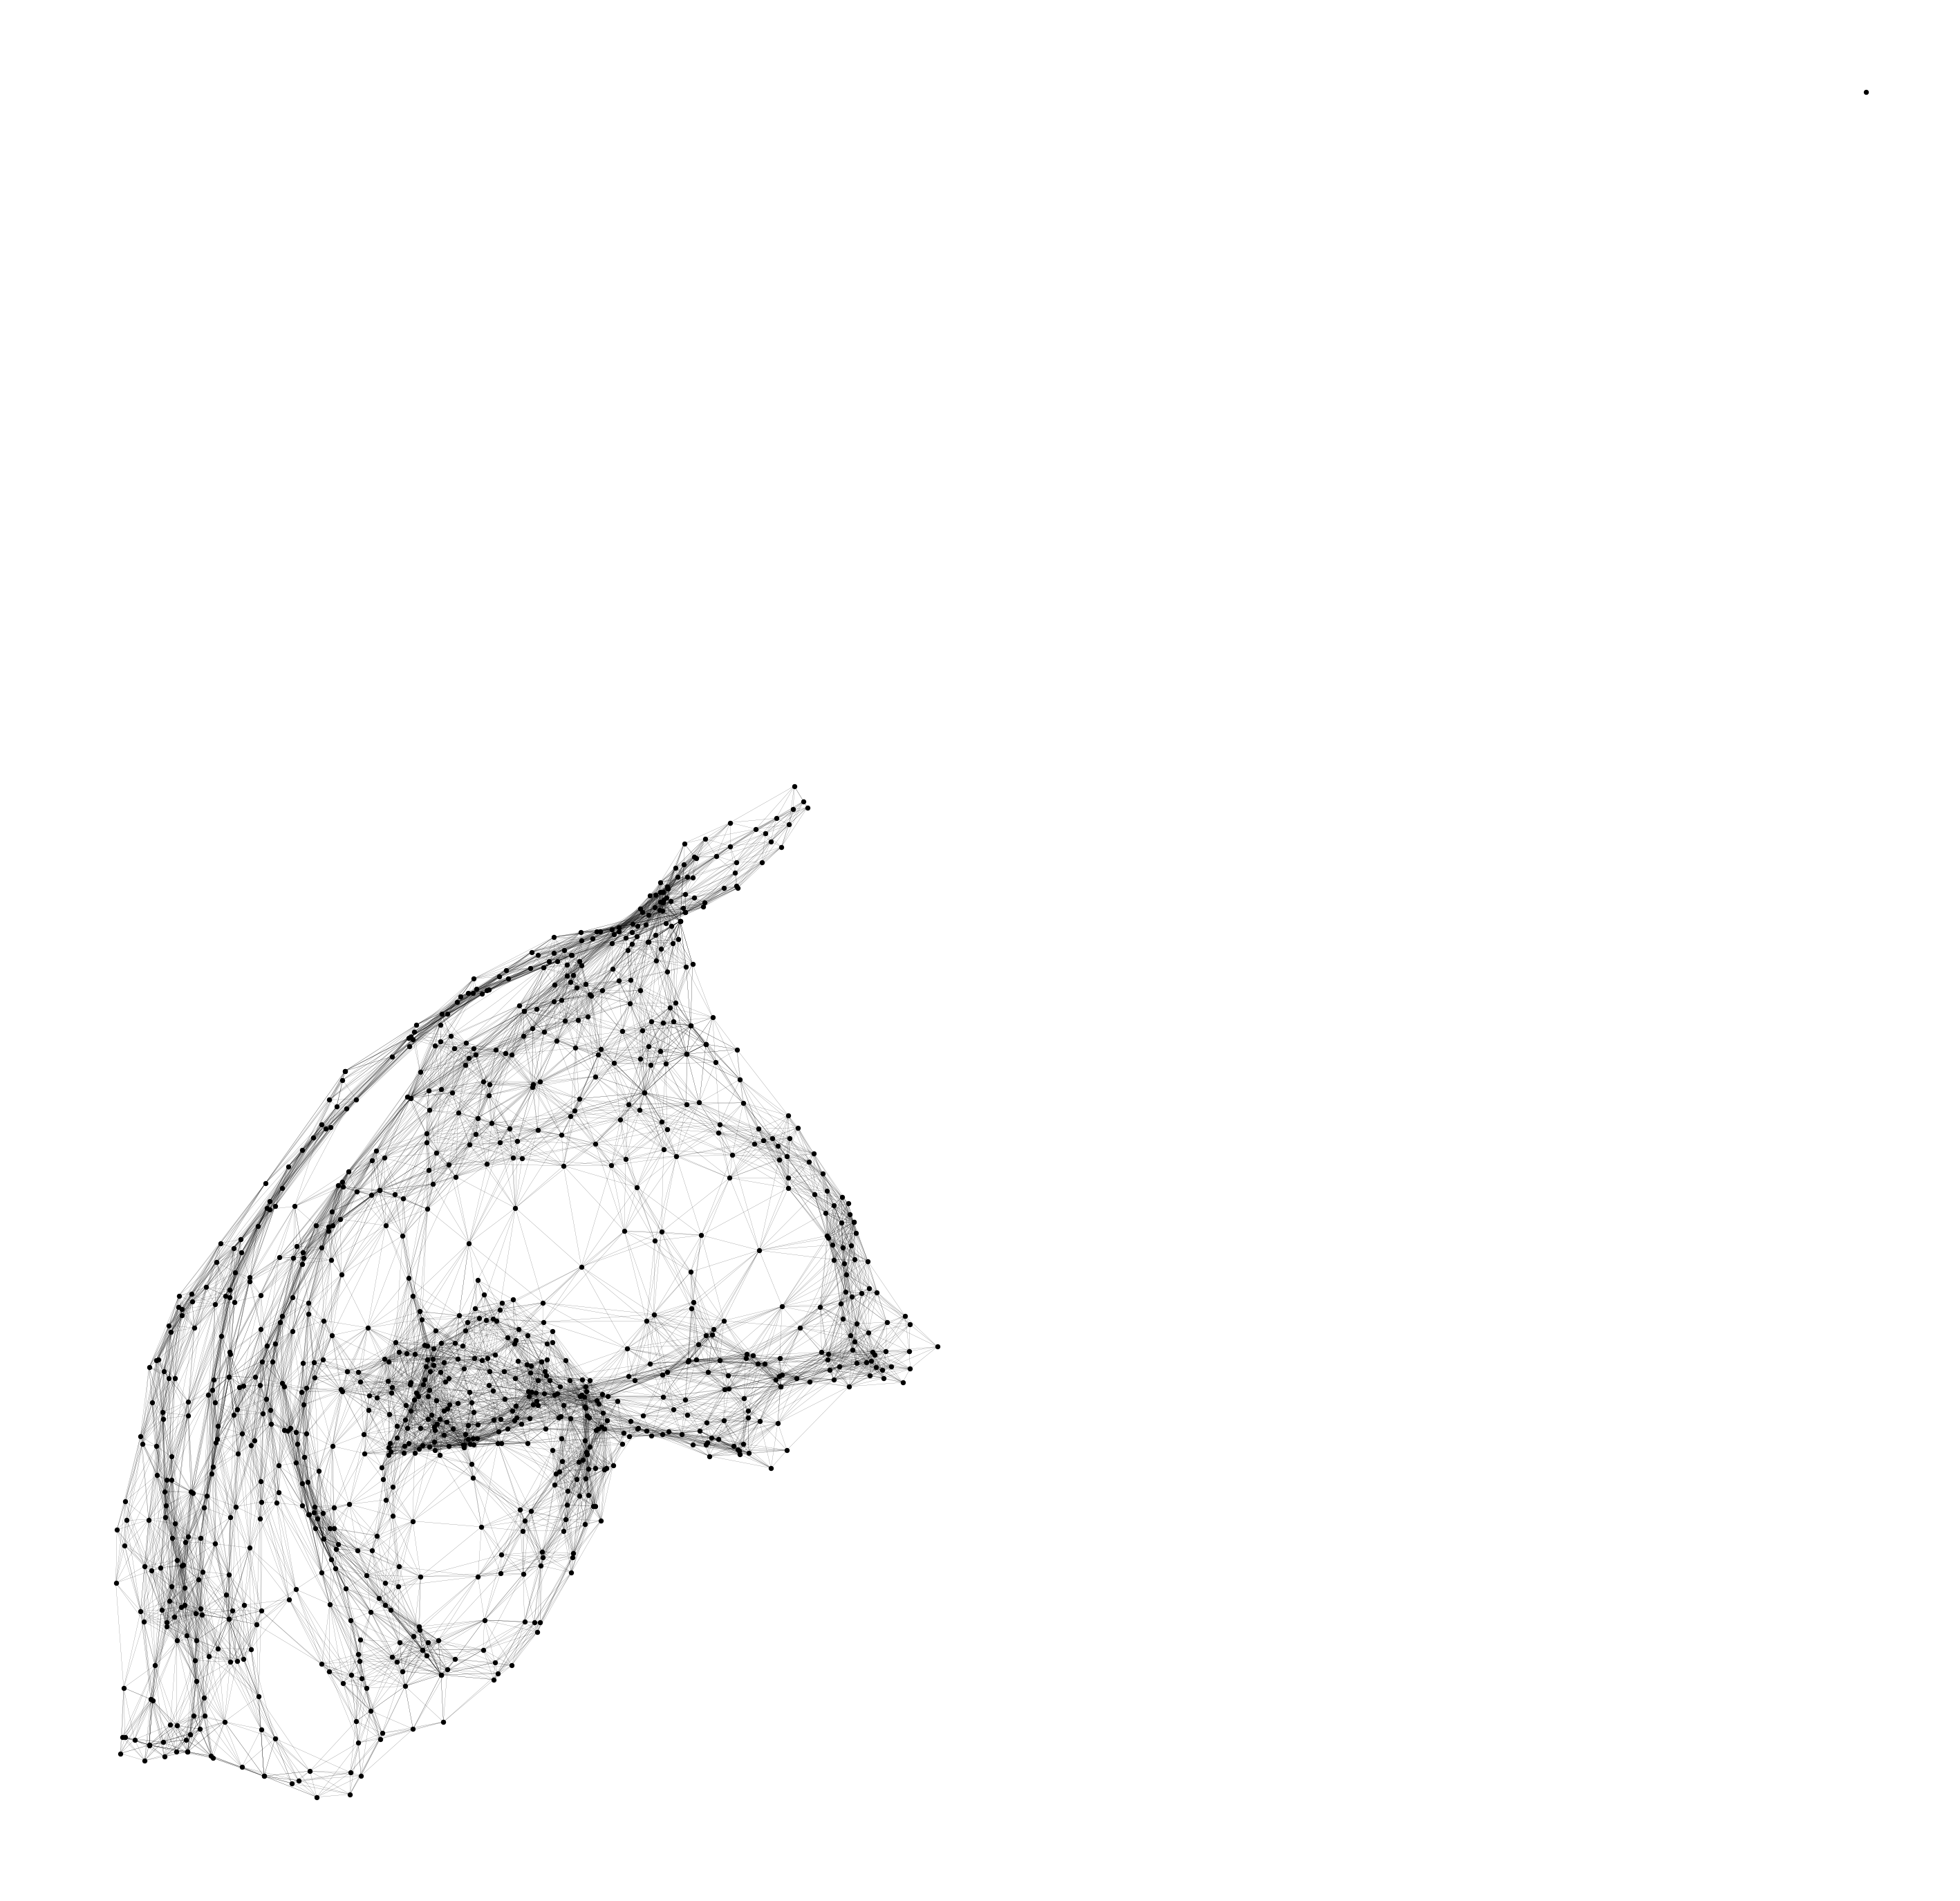

In [10]:
G = nx.Graph()
G.add_node(range(1000))
G.add_edges_from(loaded_RNN.internal_edges)
H = nx.DiGraph(G)
fig, ax = plt.subplots(figsize = [50,50])
options = {
    'node_color': 'black',
    'node_size': 40,
    'width': 0.15,
}
nx.draw(G, **options)
fig.savefig('../../sin_and_sawtooth_network_structure.png')
plt.show()

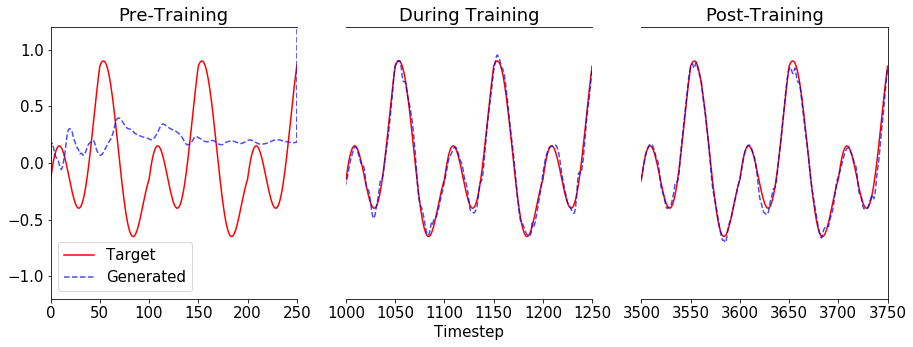

In [56]:
plt.rcParams['font.size']=15

outputs = loaded_RNN.get_output_activations()
fig,axes = plt.subplots(1,3,sharey=True, facecolor='w', figsize = [15, 5])
ax, ax2, ax3 = axes
t = np.arange(3751)
ax.plot(t, f(t), 'r-', label = 'Target')
ax.plot(outputs[0], 'b--', alpha = 0.7, label = 'Generated')
ax2.plot(t, f(t), 'r-')
ax2.plot(outputs[0], 'b--', alpha = 0.7)
ax3.plot(t, f(t), 'r-')
ax3.plot(outputs[0], 'b--', alpha = 0.7)

ax.set_xlim(0,250)
ax2.set_xlim(1000, 1250)
ax3.set_xlim(3500, 3750)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.tick_params(labelright=False)
ax2.tick_params(axis = 'y', left = False, labelright=False)

ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.tick_params(axis = 'y', left = False, labelright=False)

ax.set_title('Pre-Training')
ax2.set_title('During Training')
ax3.set_title('Post-Training')

plt.ylim(-1.2, 1.2)
ax2.set_xlabel('Timestep')
ax.legend()
fig.savefig('../../sin_and_sawtooth_output.png')
plt.show()

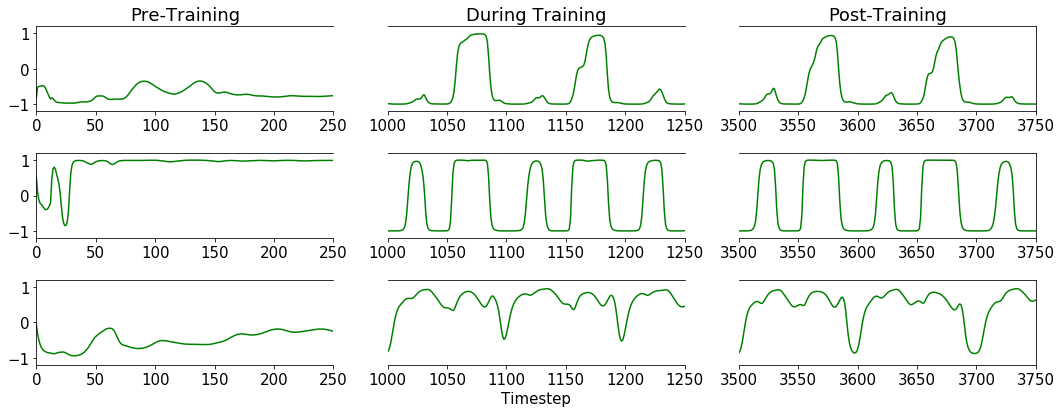

In [11]:
plt.rcParams['font.size']=15
node_activations = loaded_RNN.get_internal_node_activations()
outputs = [node_activations[15], node_activations[563], node_activations[806]]

fig,axes = plt.subplots(3,3,sharey=True, facecolor='w', figsize = [15, 6])
for idx, axis_list in enumerate(axes):
    ax, ax2, ax3 = axis_list
    t = np.arange(3751)
    ax.plot(outputs[idx], 'g')
    ax2.plot(outputs[idx], 'g',)
    ax3.plot(outputs[idx], 'g')

    ax.set_xlim(0,250)
    ax2.set_xlim(1000, 1250)
    ax3.set_xlim(3500, 3750)

    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax.tick_params(labelright=False)
    ax2.tick_params(axis = 'y', left = False, labelright=False)

    ax2.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.tick_params(axis = 'y', left = False, labelright=False)
    if idx == 0:
        ax.set_title('Pre-Training')
        ax2.set_title('During Training')
        ax3.set_title('Post-Training')
    
    plt.ylim(-1.2, 1.2)
    if idx == 2:
        ax2.set_xlabel('Timestep')
plt.tight_layout()
fig.savefig('../../sin_and_sawtooth_node_activations.png')
plt.show()